<h2 style='color:blue' align='center'>Small Image Classification Using Convolutional Neural Network (CNN)</h2>

## In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification
https://en.wikipedia.org/wiki/CIFAR-10

In [1]:
pwd

'/Users/abhishekjunnarkar/PycharmProjects/DS-ML-Projects/Module 5 - Deep Learning'

In [2]:
# %pip install tensorflow

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

<h4 style="color:purple">Load the dataset</h4>

In [4]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 52s 0us/step 


(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 10000 test images

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_train[:6]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1]], dtype=uint8)

In [8]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [9]:
y_train = y_train.reshape(-1,)
y_train[:6]

array([6, 9, 9, 4, 1, 1], dtype=uint8)

In [10]:
y_test = y_test.reshape(-1,)

In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are 

In [12]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

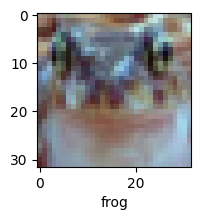

In [13]:
plot_sample(X_train, y_train, 151)

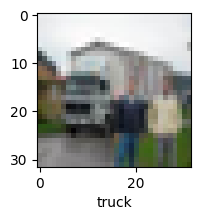

In [14]:
plot_sample(X_train, y_train, 16)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

<h4 style="color:purple">Normalizing the training data</h4>

In [15]:
#from sklearn.preprocessing import StandardScaler as scaler
#scaler = StandardScaler()
#X_train = scaler(X_train)
#X_test = scaler(X_test)
X_train = X_train / 255.0
X_test = X_test / 255.0

<h4 style="color:purple">Build simple artificial neural network (MLP) for image classification</h4>

In [16]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.3048 - loss: 1.9301
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.4182 - loss: 1.6463
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.4510 - loss: 1.5511
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.4738 - loss: 1.4889
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.4946 - loss: 1.4367


**You can see that at the end of 3 epochs, accuracy is at around 46%**

In [17]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes_mlp = [np.argmax(element) for element in y_pred]

#print("Classification Report: \n", classification_report(y_test, y_pred_classes))
print("Classification Report: \n", confusion_matrix(y_test, y_pred_classes_mlp))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Classification Report: 
 [[654  47  35  11  23  17  32  17 150  14]
 [ 59 712   6  16  10  31  18  14  76  58]
 [140  42 324  71 113  94 140  36  31   9]
 [ 52  47  79 276  41 241 164  32  35  33]
 [ 98  29 157  45 354  75 151  55  30   6]
 [ 45  27 100 158  50 412 113  45  28  22]
 [ 24  30  71  48  87  58 642  15  18   7]
 [ 94  39  61  62  73  93  54 458  23  43]
 [135  88   7  16  12  33  16  10 655  28]
 [ 81 335   7  28   8  24  35  29 112 341]]


<h4 style="color:purple">Precision quantifies the number of positive class predictions that actually belong to the positive class</h4>
<h4 style="color:purple">Recall quantifies the number of positive class predictions made out of all positive examples in the dataset</h4>
<h4 style="color:purple">F-Measure provides a single score that balances both the concerns of precision and recall in one number</h4>

<h4 style="color:purple">Now let us build a convolutional neural network to train our images</h4>

In [18]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.3819 - loss: 1.6904
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6093 - loss: 1.1234
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6593 - loss: 0.9838
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6988 - loss: 0.8788
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7238 - loss: 0.7967


**With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [21]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6785 - loss: 0.9580  


[0.9744080305099487, 0.6690000295639038]

In [22]:
y_pred_cnn = cnn.predict(X_test)
y_pred_cnn[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step 


array([[2.9574961e-03, 1.3510420e-04, 3.1366118e-03, 8.3837247e-01,
        9.7708055e-04, 1.4511617e-01, 3.8933319e-03, 2.3650865e-04,
        4.9563963e-03, 2.1886348e-04],
       [8.7813736e-04, 8.9995168e-02, 9.5194036e-07, 1.6168600e-07,
        9.9023248e-07, 2.5335034e-08, 3.2250718e-08, 2.8626868e-09,
        9.0328324e-01, 5.8413553e-03],
       [1.2999062e-01, 5.0435267e-02, 2.5983586e-03, 2.6582055e-02,
        1.4144002e-03, 2.1716913e-03, 2.7565111e-03, 6.4119871e-04,
        7.1083122e-01, 7.2578631e-02],
       [5.1846087e-01, 1.3534820e-03, 8.5460505e-04, 7.2464015e-04,
        3.4121682e-03, 3.1461357e-05, 1.6743320e-04, 1.4859506e-05,
        4.7493231e-01, 4.8186881e-05],
       [1.2375791e-04, 2.8498773e-04, 2.3811668e-02, 2.4758188e-01,
        3.1365916e-01, 1.6584828e-02, 3.9756110e-01, 5.2158637e-05,
        1.3796103e-04, 2.0252520e-04]], dtype=float32)

In [23]:


y_classes_cnn = [np.argmax(element) for element in y_pred_cnn]
y_classes_cnn[:5]


#print("Classification Report: \n", classification_report(y_test, y_pred_classes))
print("Classification Report: \n", confusion_matrix(y_test, y_classes_cnn))


Classification Report: 
 [[757  11  30  41  27  15   5  15  38  61]
 [ 29 651   6  25   3  17  12   4  31 222]
 [ 87   1 413 113 127 141  57  35   8  18]
 [ 17   2  20 534  72 259  26  32  12  26]
 [ 22   2  38  92 642  70  31  91   7   5]
 [ 11   0  18 154  48 694  11  41   6  17]
 [  3   2  27 145  64  65 665   7   7  15]
 [ 12   1  11  56  60 106   3 722   2  27]
 [104  22  10  31  15  10   6   6 740  56]
 [ 23  20   2  25   9  14   4  18  13 872]]


In [24]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

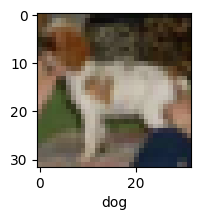

In [25]:
plot_sample(X_test, y_test,12)

In [26]:
classes[y_classes_cnn[12]]

'dog'

In [27]:
classes[y_pred_classes_mlp[12]]

'automobile'